In [28]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
from helpers import pyramid
from helpers import sliding_window

# working with resnet model

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, Model
from keras.utils.vis_utils import plot_model
import PIL
import numpy as np
from keras.applications.imagenet_utils import decode_predictions 
from PIL import Image
from PIL.Image import Image as imgclass
import cv2

In [30]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False

In [31]:
# plot_model(base_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# sliding window

In [32]:
filename = 'car-image-road2.jpg'
car_image_prediction = tf.keras.utils.load_img(filename, target_size = (224, 224))

In [33]:
car_image = cv2.imread('car-image-road2.jpg')

1/1 [==============================] - 1s 1s/step


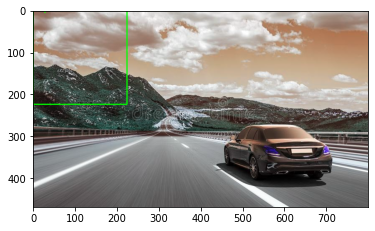

1/1 [==============================] - 0s 135ms/step


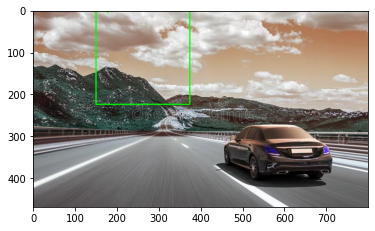

1/1 [==============================] - 0s 127ms/step


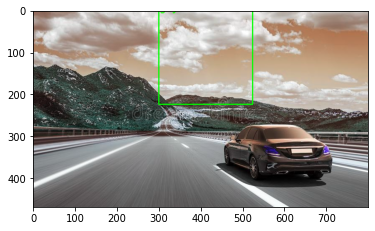

1/1 [==============================] - 0s 131ms/step


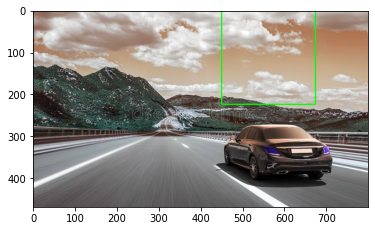

1/1 [==============================] - 0s 136ms/step


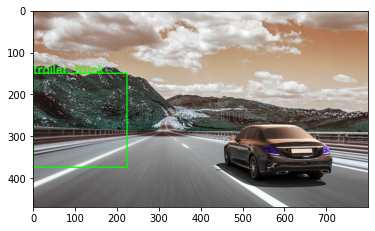

1/1 [==============================] - 0s 136ms/step


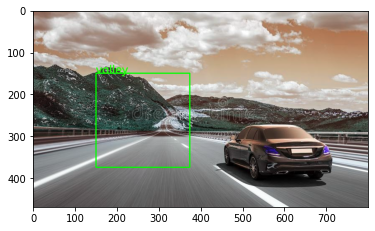

1/1 [==============================] - 0s 140ms/step


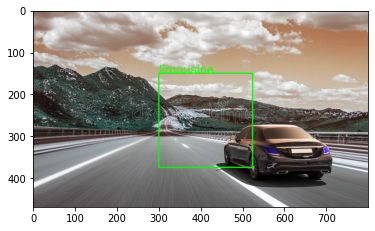

1/1 [==============================] - 0s 129ms/step


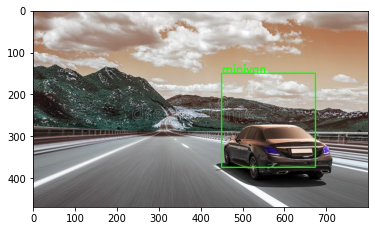

1/1 [==============================] - 0s 128ms/step


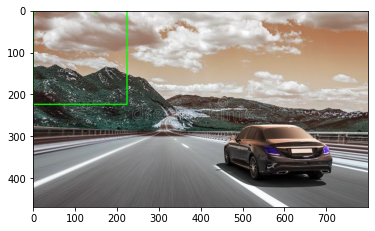

1/1 [==============================] - 0s 149ms/step


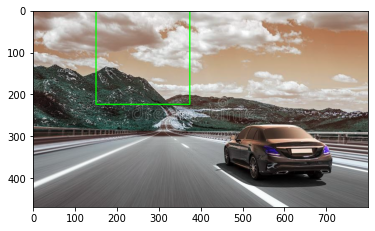

In [34]:
prediction_positions = []
for layer in pyramid(car_image, scale = 2):
  for (x, y, window) in sliding_window(layer, stepSize = 150, windowSize = (224, 224)):
    if window.shape[0] != 224 or window.shape[1] != 224:
      continue
    
    clone: imgclass = layer.copy()
    clone = Image.fromarray(np.uint8(clone)).convert('RGB')
    crop_image: imgclass = clone.crop((x, y, x + 224, y + 224))
    
    clone: np.ndarray = np.array(car_image)
    
    crop_image: np.ndarray = np.array(crop_image) 
    crop_image = np.expand_dims(crop_image, axis=0)
    
    processed_image = tf.keras.applications.resnet50.preprocess_input(crop_image) 
    prediction = base_model.predict(processed_image)
    
    predicted: list = decode_predictions(prediction)
    
    cv2.rectangle(clone, (x, y), (x + 224, y + 224), (0, 255, 0), 2)
    cv2.putText(clone, predicted[0][0][1], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    plt.imshow(clone)
    plt.show()